# Explore here

Imports

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from scipy.stats import pointbiserialr
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import timeit
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.metrics import f1_score, make_scorer, mean_absolute_error, r2_score, mean_squared_error
import pickle

Importing Data

In [19]:
# Your code here
url = "https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv"
df = pd.read_csv(url)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


EDA

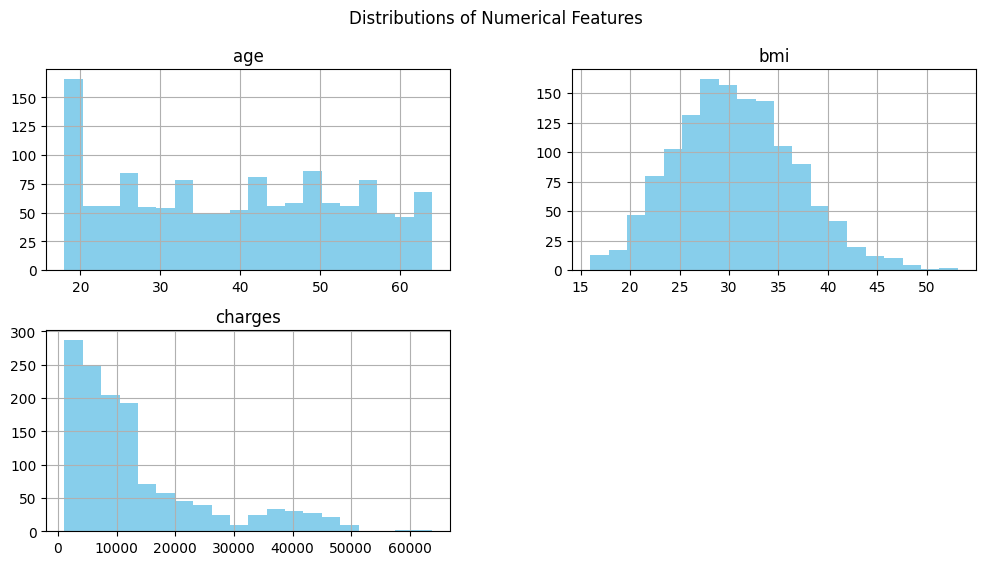

In [20]:
# Histograms for numerical variables
df[['age', 'bmi', 'charges']].hist(bins=20, figsize=(12, 6), color='skyblue')
plt.suptitle("Distributions of Numerical Features")
plt.show()

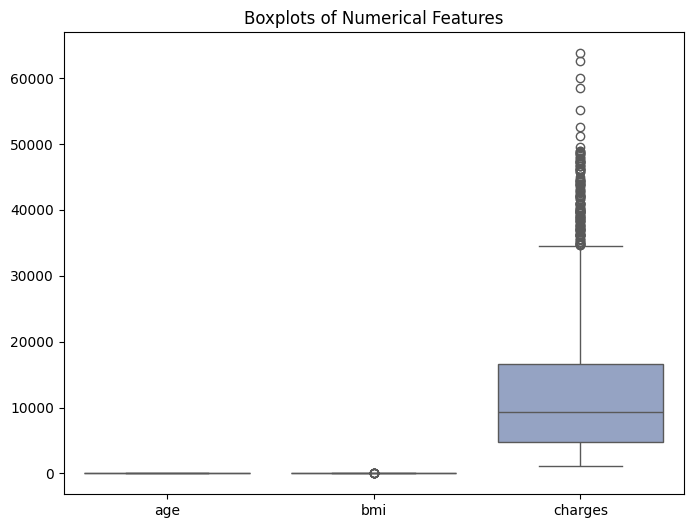

In [21]:
# Boxplot for a quick look at the spread and outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[['age', 'bmi', 'charges']], palette="Set2")
plt.title("Boxplots of Numerical Features")
plt.show()

In [22]:
# Correlation Matrix
corr_matrix = df.corr()

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

ValueError: could not convert string to float: 'female'

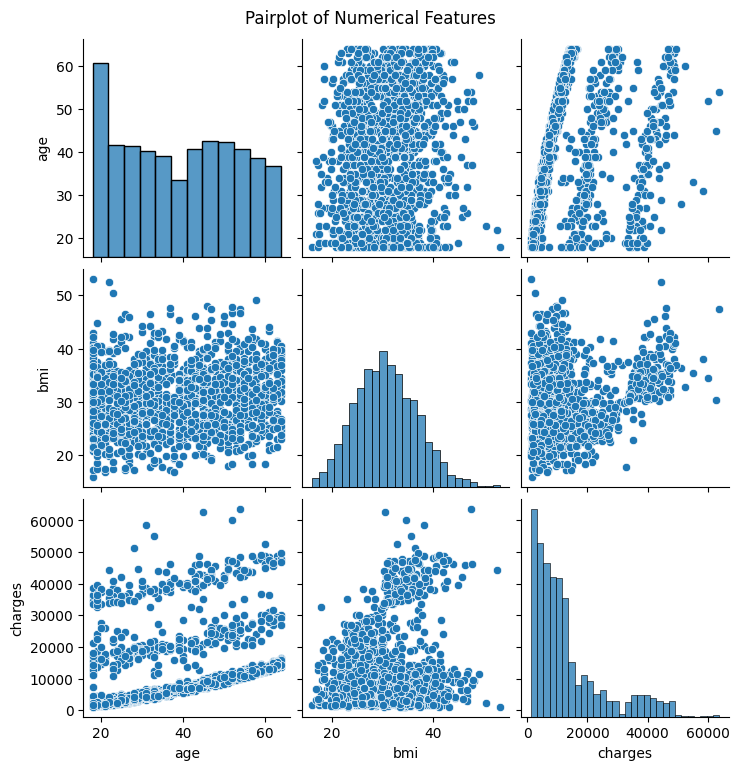

In [ ]:
# Pairplot to visualize relationships between variables
sns.pairplot(df[['age', 'bmi', 'charges']])
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

In [ ]:
# Encoding categorical Variables
df = pd.get_dummies(df, drop_first= True)

# Splitting the Data

X = df.drop('charges', axis = 1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Linear Regression Model

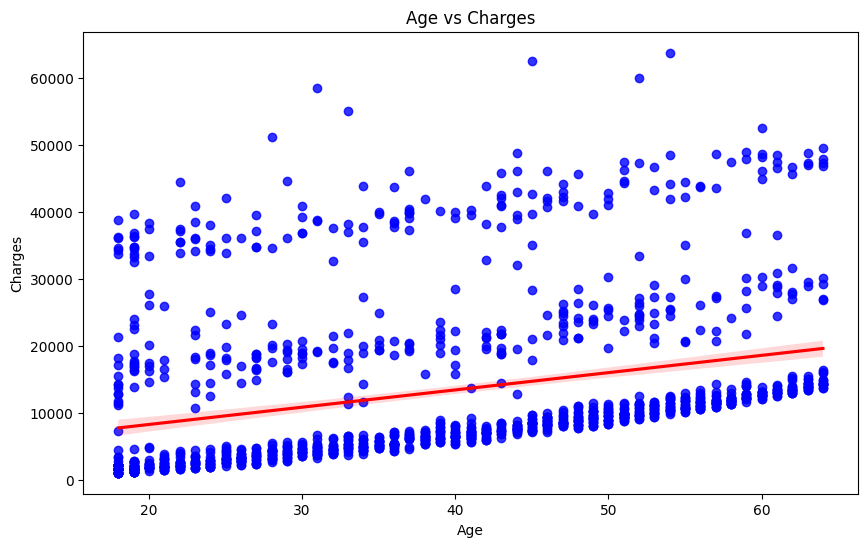

In [ ]:
# Linear regression plot for Age vs Charges
plt.figure(figsize=(10, 6))
sns.regplot(x='age', y='charges', data=df, scatter_kws={'color':'blue'}, line_kws={'color':'red'})
plt.title('Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

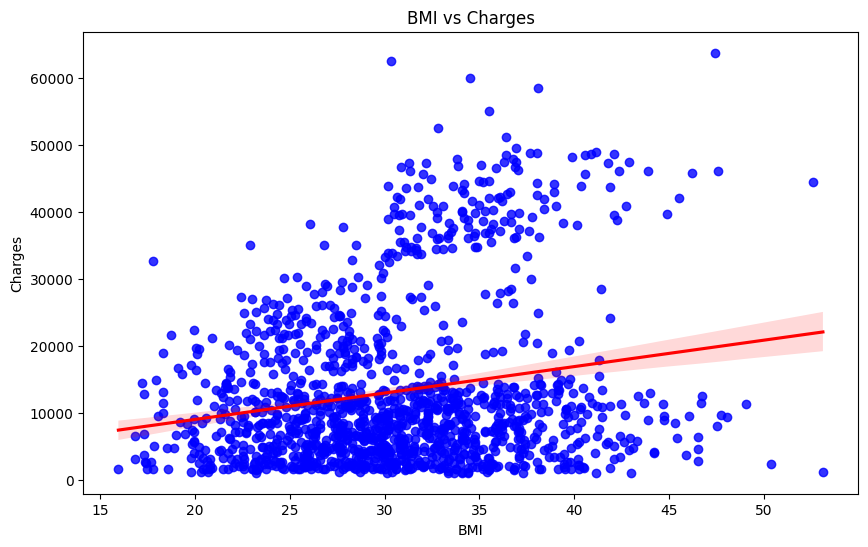

In [ ]:
# Linear regression plot for BMI vs Charges
plt.figure(figsize=(10, 6))
sns.regplot(x='bmi', y='charges', data=df, scatter_kws={'color':'blue'}, line_kws={'color':'red'})
plt.title('BMI vs Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

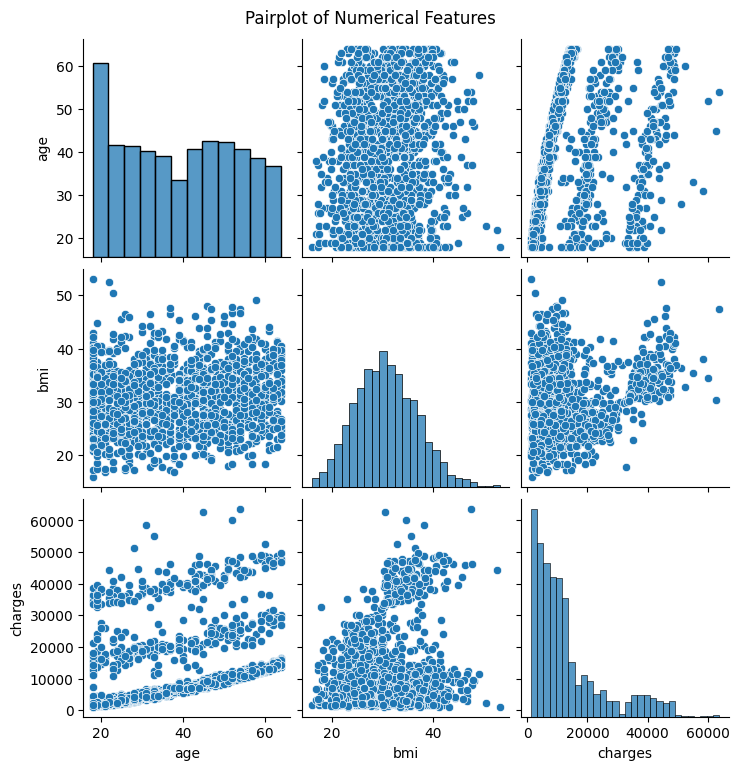

In [ ]:
# Pairplot to show linear relationships between numerical features
sns.pairplot(df[['age', 'bmi', 'charges']])
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

In [ ]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Model parameters
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")

Intercept: -11931.21905032666
Coefficients: [ 2.56975706e+02  3.37092552e+02  4.25278784e+02 -1.85916916e+01
  2.36511289e+04 -3.70677326e+02 -6.57864297e+02 -8.09799354e+02]


Model Evaluation

In [ ]:
# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 33596915.85136145
R^2 Score: 0.7835929767120724


Optimize Previous Model

In [ ]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

y_pred_ridge = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_r2 = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression MSE: {ridge_mse}")
print(f"R^2 Score: {ridge_r2}")

Ridge Regression MSE: 33645037.09177902
R^2 Score: 0.7832830144988215
